In [35]:
#Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
red_df = pd.read_csv(r'C:\Users\zrodn\Springboard\wine\winequality-red.csv', sep=';')
white_df = pd.read_csv(r'C:\Users\zrodn\Springboard\wine\winequality-white.csv', sep=';')

In [68]:
#Merge dataframes into one and designate varietal (red/white)
red_df['red'] = True
white_df['red'] = False
frames = [red_df, white_df]
wines_df = pd.concat(frames)
wines_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,True
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,True
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,True
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,True
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,True


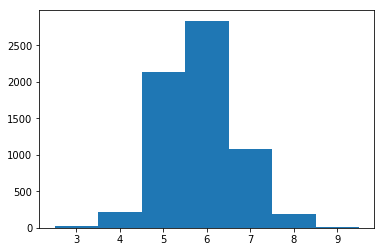

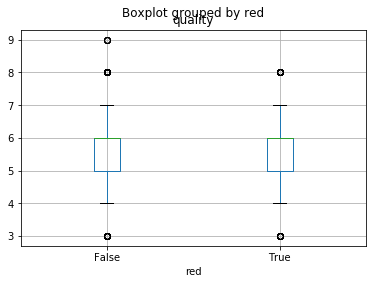

In [37]:
#Graphs!

quality_freq = pd.crosstab(index=wines_df['quality'], columns='count')
plt.hist(wines_df['quality'], bins=np.arange(wines_df['quality'].min(), wines_df['quality'].max()+2), align='left')
#The dataset is roughly normal, with only a few really good or really bad wines.

wines_df.boxplot(column='quality', by='red')
#The distribution of quality between the red and white wines is almost the same.


In [85]:
#Set up logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

wines_lr = wines_df.copy()
del wines_lr['red']

X_train, X_test, y_train, y_test = train_test_split(wines_lr.values, (wines_df.red == True).values, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4872, 12) (4872,)
(1625, 12) (1625,)


In [86]:
#Basic logistic regression model
clf = LogisticRegression()
# Fit the model on the training data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(X_test), y_test))

0.9778461538461538


In [87]:
#Tuned logistic regression model
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.1, 1, 10, 100, 1000]}

clf = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=5, scoring='accuracy')

clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.9864615384615385


In [88]:
#Logistic Regression for quality
wines_qual = wines_df.copy()
wines_qual['qual_bool'] = (wines_df['quality'] >= 8)
del wines_qual['quality']
wines_qual['qual_bool'].describe()


count      6497
unique        2
top       False
freq       6299
Name: qual_bool, dtype: object

In [89]:
X_train, X_test, y_train, y_test = train_test_split((wines_qual.drop('qual_bool', axis=1)).values, (wines_qual.qual_bool == True).values, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4872, 12) (4872,)
(1625, 12) (1625,)


In [90]:
#Tuned logistic regression model
params = {'C': [0.001, 0.1, 1, 10, 100, 1000]}

clf = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=5, scoring='accuracy')

clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.9704615384615385


In [ ]:
#Predicting all wines as False would give an accuracy score of .9695243959, so this model is only slightly better than that. Yay.